In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf

In [ ]:
#the imports
import random
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Activation, AveragePooling2D
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
men = []
women = []
stranger = []
img_size = 300
MEN_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Training/male'
WOMEN_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Training/female'
STRANGER_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Training/stranger'
DIRS = [(0, MEN_IMGS_PATH), (1, WOMEN_IMGS_PATH),(2,STRANGER_IMGS_PATH)]

In [ ]:
train_images = []
labels = []
for num, _dir in DIRS:
    _dir = _dir + '/'
    count = 0
    for file in os.listdir(_dir):
        img = image.load_img(_dir + str(file), target_size=(img_size, img_size))
        img = image.img_to_array(img)
        img = img/255
        train_images.append(img)
        labels.append(num)
        count += 1

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
train_images[1].shape

(300, 300, 3)

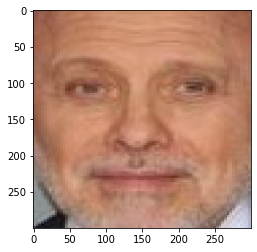

In [ ]:
plt.imshow(train_images[4])

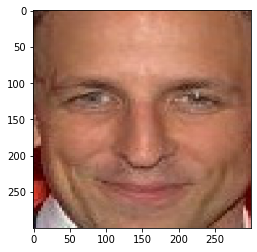

In [ ]:
plt.imshow(train_images[1510])

In [ ]:
len(train_images)

4800

In [ ]:
X = np.array(train_images)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=101)
print(X_train.shape)
print(X_test.shape)

(4320, 300, 300, 3)
(480, 300, 300, 3)


In [ ]:
len(X_train)

4320

In [ ]:
len(X_test)

480

In [ ]:
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)
print(y_train_labels.shape)
print(y_test_labels.shape)

(4320, 3)
(480, 3)


In [ ]:
def build(width, height, depth, classes):
    #initialize the model along with the input shape
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (depth, height, width)
        chanDim = 1
        
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(64, (3,3), padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # (CONV -> RELU)*2 -> AVGPOOL
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> AVGPOOL
    model.add(Convolution2D(512, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # softmax -> just to check the accuracy with this (softmax would work too)
    model.add(Dense(classes))
    model.add(Activation('softmax'))
    
    return model

In [ ]:
model = build(img_size, img_size, 3, 3)

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 300, 300, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
activation_1 (Activation)    (None, 100, 100, 128)     0

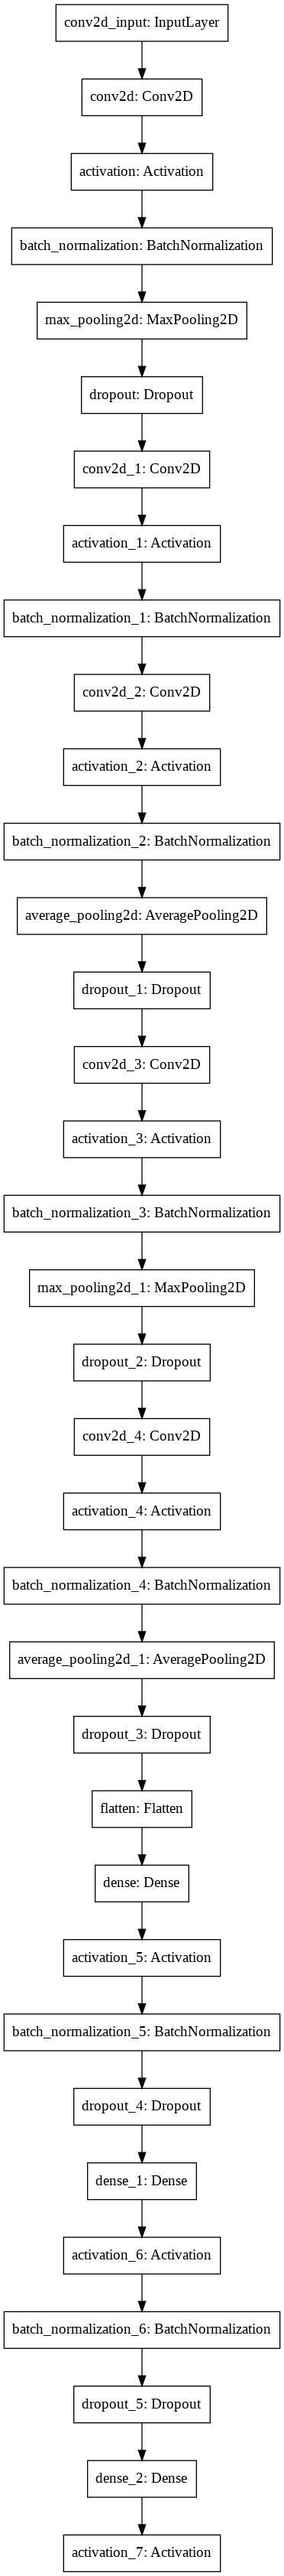

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Colab Notebooks/model.jpg')

In [ ]:
history = model.fit(X_train, y_train_labels, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
216/216 [==============================] - 8s 38ms/step - loss: 0.5907 - accuracy: 0.7170 - val_loss: 3.0472 - val_accuracy: 0.3461
Epoch 2/10
216/216 [==============================] - 8s 37ms/step - loss: 0.4475 - accuracy: 0.8200 - val_loss: 0.6388 - val_accuracy: 0.7338
Epoch 3/10
216/216 [==============================] - 8s 37ms/step - loss: 0.3536 - accuracy: 0.8683 - val_loss: 0.4283 - val_accuracy: 0.8472
Epoch 4/10
216/216 [==============================] - 8s 37ms/step - loss: 0.2648 - accuracy: 0.9016 - val_loss: 0.2516 - val_accuracy: 0.9074
Epoch 5/10
216/216 [==============================] - 8s 38ms/step - loss: 0.2314 - accuracy: 0.9123 - val_loss: 0.1932 - val_accuracy: 0.9421
Epoch 6/10
216/216 [==============================] - 8s 37ms/step - loss: 0.2003 - accuracy: 0.9306 - val_loss: 0.2084 - val_accuracy: 0.9271
Epoch 7/10
216/216 [==============================] - 8s 37ms/step - loss: 0.1720 - accuracy: 0.9413 - val_loss: 0.1846 - val_accuracy: 0.9468

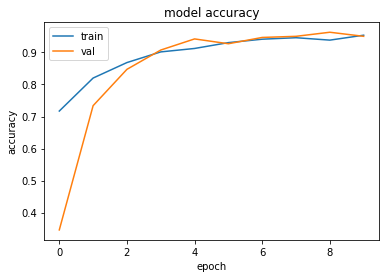

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

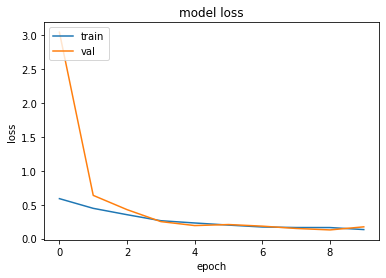

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_test.shape
X_train.shape
y_train_labels.shape
y_test_labels.shape

(480, 3)

In [ ]:
#X_test=np.ndarray(X_test)
loss_and_metrics = model.evaluate(X_test, y_test_labels, batch_size=48)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

10/10 [==============================] - 0s 33ms/step - loss: 0.1407 - accuracy: 0.9604
## evaluation loss and_metrics ##
[0.14073750376701355, 0.9604166746139526]


In [ ]:
predictions = model.predict_classes(X_test)
print(predictions)

[2 1 1 1 0 1 1 0 2 0 2 2 1 1 0 2 2 0 2 0 0 0 0 2 2 1 2 2 0 1 1 1 1 0 2 1 0
 2 2 2 2 0 0 2 1 1 1 2 0 0 2 2 1 2 1 2 2 2 0 2 0 2 1 0 0 2 2 1 0 0 2 0 2 1
 0 1 2 2 1 1 1 0 1 1 2 0 2 1 0 1 1 2 0 2 1 2 1 1 1 2 2 2 1 0 0 1 2 1 0 2 1
 1 0 1 2 0 2 0 2 1 1 2 2 2 0 1 1 2 0 0 1 1 0 2 0 2 1 0 1 1 1 1 1 0 1 0 1 0
 1 2 1 2 0 0 1 0 0 0 1 0 1 2 2 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 1 2 1 1 2 0
 0 0 2 1 1 2 1 0 0 2 2 2 0 0 0 1 0 2 2 1 2 2 2 2 2 0 1 0 0 1 2 1 1 1 1 0 2
 1 0 1 0 1 2 0 2 0 2 0 1 0 0 1 1 1 1 2 2 1 0 0 0 1 1 1 2 2 2 0 1 0 1 1 0 2
 1 0 1 1 0 2 0 1 1 1 0 1 0 0 1 1 1 0 1 2 2 1 1 1 0 2 2 2 1 2 1 2 2 2 0 2 2
 0 0 2 2 0 2 1 0 1 0 1 1 0 2 1 1 0 2 0 0 0 2 2 1 0 0 2 0 1 0 0 2 1 1 0 2 0
 1 0 0 1 1 1 1 2 0 0 0 2 1 2 2 1 2 2 1 1 0 0 2 1 1 0 2 1 1 1 0 1 2 0 1 2 0
 2 1 0 0 1 0 1 0 1 2 1 2 2 2 0 2 1 2 2 2 0 1 1 1 1 1 1 2 1 1 1 0 0 1 1 2 1
 0 0 1 2 0 1 0 1 0 1 1 1 2 2 1 0 2 2 1 1 0 1 1 1 2 1 1 2 0 1 2 1 0 0 0 0 0
 2 2 1 0 2 0 0 1 2 1 2 1 0 1 1 0 0 1 2 2 0 2 1 1 1 0 0 0 1 0 1 0 1 0 0 2]


In [ ]:
print(confusion_matrix(predictions, y_test))

[[147   1   1]
 [ 15 171   2]
 [  0   0 143]]


In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       149
           1       0.99      0.91      0.95       188
           2       0.98      1.00      0.99       143

    accuracy                           0.96       480
   macro avg       0.96      0.97      0.96       480
weighted avg       0.96      0.96      0.96       480



In [ ]:
random_indices = [random.randint(0, 280) for i in range(9)]

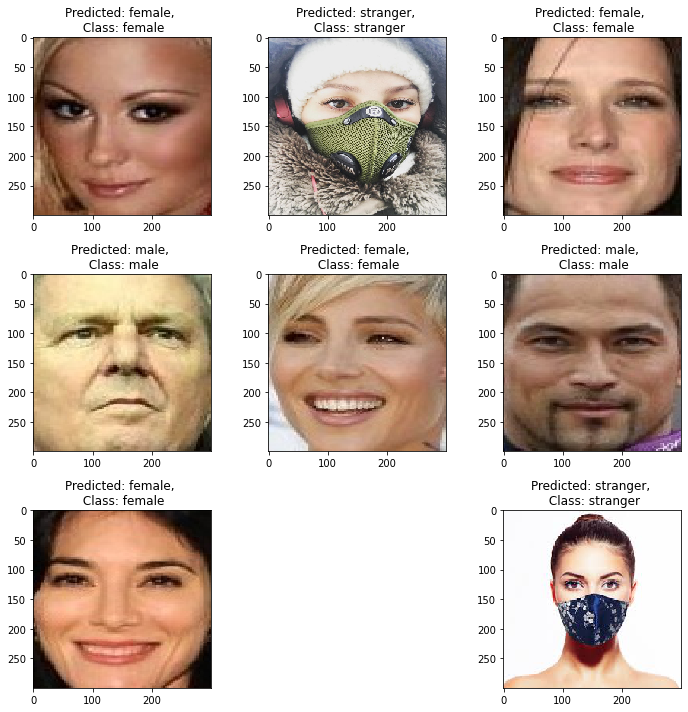

In [ ]:
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred = predictions[index]
    if pred==0:
      pred = 'male' 
    elif pred==1:
      pred = 'female' 
    else :
      pred = 'stranger'
    if  y_test[index]==0:
      actual = 'male'
    elif  y_test[index]==1:
      actual = 'female'
    else:
      actual = 'stranger'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()

In [ ]:
from sklearn import tree

In [ ]:
#DecisionTreeClassifier
#AH
dtc_clf = tree.DecisionTreeClassifier()

In [ ]:
X_train = X_train.reshape(4320,300*300*3) 
X_test = X_test.reshape(480,300*300*3) 
# AH.I have reshaped data into 2d for Decision Tree

In [ ]:
#AH
dtc_clf = dtc_clf.fit(X_test, y_test)
dtc_prediction = dtc_clf.predict(X_test)
print (dtc_prediction)

[2 0 1 1 0 1 1 0 2 0 2 2 1 1 0 2 2 0 2 0 0 0 0 2 2 1 2 2 0 1 1 1 1 0 2 1 0
 2 2 2 2 0 0 2 1 1 1 2 0 0 2 2 1 2 1 2 2 2 0 2 0 2 0 0 0 2 2 1 0 0 2 0 2 1
 0 0 2 2 1 1 1 0 1 1 2 0 2 0 0 1 1 2 0 2 1 2 1 1 1 2 2 2 1 0 0 2 2 1 0 2 1
 1 0 1 2 0 2 0 2 1 1 2 2 2 0 1 1 2 0 0 1 1 0 2 0 2 1 0 1 1 1 1 1 0 1 0 1 0
 1 2 1 2 0 1 1 0 0 0 1 0 1 2 2 1 1 1 0 0 0 1 1 1 1 0 1 2 1 2 2 1 2 0 1 2 0
 0 0 2 2 0 2 1 0 0 2 2 2 0 0 0 1 0 2 2 1 2 2 2 2 2 0 1 0 0 1 2 1 1 1 1 0 2
 1 0 1 0 1 2 0 2 0 2 0 1 0 0 1 0 1 1 2 2 1 0 0 0 1 1 1 2 2 2 0 1 0 1 1 0 2
 1 0 1 1 0 2 0 1 1 1 0 0 0 0 1 1 1 0 1 2 2 1 1 1 0 2 2 2 1 2 1 2 2 2 0 2 2
 0 0 2 2 0 2 1 0 1 0 1 1 0 2 1 1 0 2 0 0 0 2 2 1 0 0 2 0 1 0 2 2 1 1 0 2 0
 1 0 0 1 1 1 1 2 0 0 0 2 1 2 2 1 2 2 1 1 0 0 2 1 1 0 2 1 1 1 0 1 2 0 1 2 0
 2 0 0 0 1 0 1 0 1 2 1 2 2 2 0 2 1 2 2 2 0 1 0 1 1 1 1 2 1 1 1 0 0 1 1 2 1
 0 0 1 2 0 1 0 1 0 1 1 1 2 2 1 0 2 2 1 1 0 1 1 1 2 1 1 2 0 0 2 0 0 0 0 0 0
 2 2 1 0 2 0 0 1 2 1 2 1 0 1 1 0 0 0 2 2 0 2 1 1 1 0 0 0 1 0 1 0 1 0 0 2]


In [ ]:
#AH
print(confusion_matrix(dtc_prediction, y_test))

[[162   0   0]
 [  0 172   0]
 [  0   0 146]]


In [ ]:
print(classification_report(dtc_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       172
           2       1.00      1.00      1.00       146

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=101)
print(X_train.shape)
print(X_test.shape)

(4320, 300, 300, 3)
(480, 300, 300, 3)


In [ ]:
random_indices = [random.randint(0, 280) for i in range(9)]

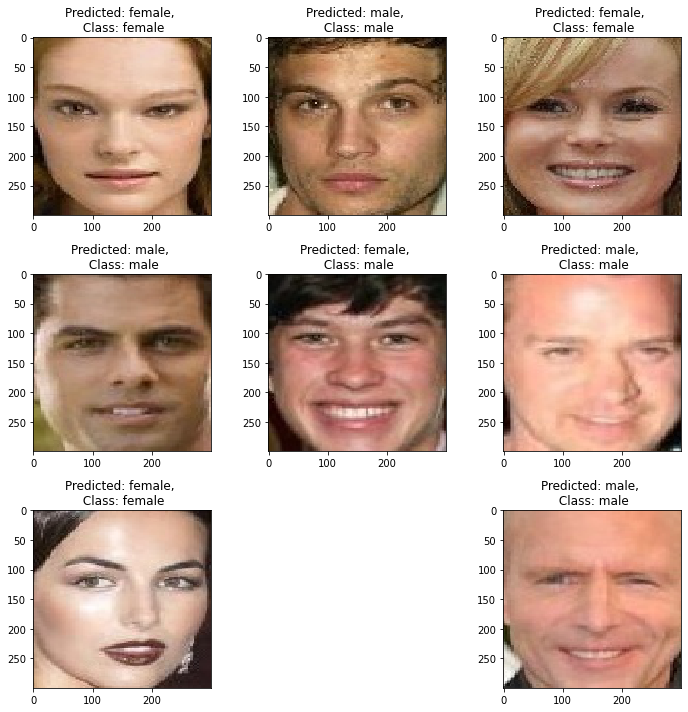

In [ ]:
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred = predictions[index]
    if pred==0:
      pred = 'male' 
    elif pred==1:
      pred = 'female' 
    else :
      pred = 'stranger'
    if  y_test[index]==0:
      actual = 'male'
    elif  y_test[index]==1:
      actual = 'female'
    else:
      actual = 'stranger'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()

In [ ]:

model.save('/content/drive/My Drive/Colab Notebooks/ai_project.h5')

In [ ]:
from keras.models import load_model
mymodel = load_model('/content/drive/My Drive/Colab Notebooks/ai_project.h5')

In [ ]:
test_dir='/content/drive/My Drive/Colab Notebooks/gender/Validation'

In [ ]:
men = []
women = []
stranger = []
img_size = 300
MEN_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Validation/male'
WOMEN_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Validation/female'
STRANGER_IMGS_PATH = '/content/drive/My Drive/Colab Notebooks/gender/Validation/stranger'
DIRS = [(0, MEN_IMGS_PATH), (1, WOMEN_IMGS_PATH),(2,STRANGER_IMGS_PATH)]

test_images = []
labels = []
for num, _dir in DIRS:
    _dir = _dir + '/'
    count = 0
    for file in os.listdir(_dir):
        img = image.load_img(_dir + str(file), target_size=(img_size, img_size))
        img = image.img_to_array(img)
        img = img/255
        test_images.append(img)
        labels.append(num)
        count += 1


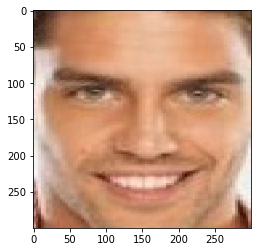

In [ ]:
plt.imshow(test_images[4])

In [ ]:
X = np.array(test_images)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=101)
print(X_train.shape)
print(X_test.shape)

(1080, 300, 300, 3)
(120, 300, 300, 3)


In [ ]:
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)
print(y_train_labels.shape)
print(y_test_labels.shape)

(1080, 3)
(120, 3)


In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test_labels, batch_size=48)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

3/3 [==============================] - 0s 63ms/step - loss: 0.2796 - accuracy: 0.9333
## evaluation loss and_metrics ##
[0.27962690591812134, 0.9333333373069763]


In [ ]:
predictions = model.predict_classes(X_test)
print(predictions)

[2 1 1 2 0 2 0 2 2 2 1 1 1 1 2 0 0 2 1 0 0 2 0 2 2 1 1 2 2 2 0 1 0 2 1 1 0
 1 2 2 0 1 1 0 0 2 0 0 2 1 0 1 1 1 1 0 0 2 1 1 1 0 1 1 2 2 2 0 2 0 1 1 2 1
 1 2 2 0 2 1 2 0 2 2 2 0 2 2 0 1 2 1 0 2 2 1 0 2 2 1 0 2 2 0 0 0 0 2 1 0 0
 0 1 1 0 2 0 2 0 2]


In [ ]:
print(confusion_matrix(predictions, y_test))

[[38  0  0]
 [ 7 29  1]
 [ 0  0 45]]


In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        38
           1       1.00      0.78      0.88        37
           2       0.98      1.00      0.99        45

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [ ]:
random_indices = [random.randint(0,120 ) for i in range(9)]

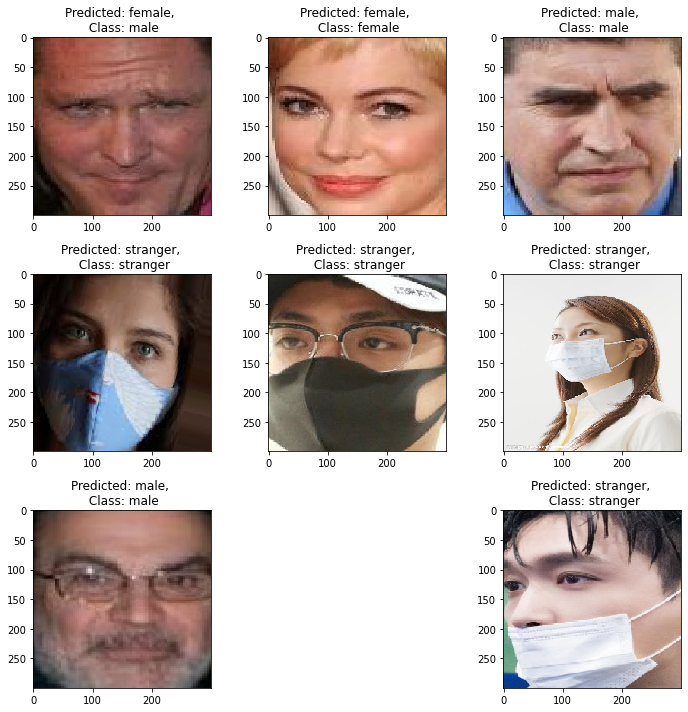

In [ ]:
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred = predictions[index]
    if pred==0:
      pred = 'male' 
    elif pred==1:
      pred = 'female' 
    else :
      pred = 'stranger'
    if  y_test[index]==0:
      actual = 'male'
    elif  y_test[index]==1:
      actual = 'female'
    else:
      actual = 'stranger'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()